In [1]:
import pandas as pd

In [2]:
Fake_News_Data_1 = pd.read_csv('Fake_News_Data_1.csv')
Fake_News_Data_2 = pd.read_csv('Fake_News_Data_2.csv')
Fake_News_Data_3 = pd.read_csv('Fake_News_Data_3.csv')
Fake_News_Data_4 = pd.read_csv('Fake_News_Data_4.csv')
Fake_News_Data_5 = pd.read_csv('Fake_News_Data_5.csv')
Fake_News_Data_6 = pd.read_csv('Fake_News_Data_6.csv')
Fake_News_Data_7 = pd.read_csv('Fake_News_Data_7.csv')
Fake_News_Data_8 = pd.read_csv('Fake_News_Data_8.csv')
Fake_News_Data_9 = pd.read_csv('Fake_News_Data_9.csv')
Fake_News_Data_10 = pd.read_csv('Fake_News_Data_10.csv')
Fake_News_Data_11 = pd.read_csv('Fake_News_Data_11.csv')
Fake_News_Data_12 = pd.read_csv('Fake_News_Data_12.csv')
Fake_News_Data_13 = pd.read_csv('Fake_News_Data_13.csv')
Fake_News_Data_14 = pd.read_csv('Fake_News_Data_14.csv')

In [3]:
Fake_News_Data = pd.concat([Fake_News_Data_1, Fake_News_Data_2, Fake_News_Data_3, Fake_News_Data_4, Fake_News_Data_5, Fake_News_Data_6, Fake_News_Data_7, Fake_News_Data_8, Fake_News_Data_9, Fake_News_Data_10, Fake_News_Data_11, Fake_News_Data_12, Fake_News_Data_13, Fake_News_Data_14])

In [4]:
Fake_News_Data = Fake_News_Data.iloc[ : , 1: ]

In [5]:
Fake_News_Data.index = range(0, len(Fake_News_Data))

In [6]:
Fake_News_Data = Fake_News_Data.rename(columns={'label': 'fake'})

In [7]:
Fake_News_Data['fake'] = Fake_News_Data['fake'].astype('category')

Dataset contains three columns: Title (about the text news heading); Text (about the news content); and fake (0 = yes and 1 = no)

In [8]:
Fake_News_Data.head()

,title,text,fake
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [9]:
Fake_News_Data.describe(include='all')

,title,text,fake
count,66622,67098,67133
unique,58583,58875,2
top,Factbox: Trump fills top jobs for his administ...,,1
freq,13,683,34568


In [10]:
Fake_News_Data.isnull().sum()

title    511
text      35
fake       0
dtype: int64

In [11]:
Fake_News_Data = Fake_News_Data.dropna(subset=['text'])

In [12]:
Fake_News_Data.isnull().sum()

title    511
text       0
fake       0
dtype: int64

In [13]:
## Alternativa mucho mas costosa computacionalmente

# for i in range(0, len(Fake_News_Data)):

   #  if Fake_News_Data['text'].isnull()[i] == True :

   #     Fake_News_Data.drop([i], axis=0)

In [14]:
Fake_News_Data.index = range(0, len(Fake_News_Data))

In [15]:
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(8,8)})

In [16]:
prop_Fake_yes = len( Fake_News_Data.loc[ Fake_News_Data['fake']== 0 , :] ) / len(Fake_News_Data)

prop_Fake_no = len( Fake_News_Data.loc[ Fake_News_Data['fake']== 1 , :] ) / len(Fake_News_Data)

In [17]:
Fake_News_Data['proportion_Fakes'] = 0


for i in range(0, len(Fake_News_Data)):

    if ( Fake_News_Data['fake'] == 0 )[i] :

        Fake_News_Data['proportion_Fakes'][i] = prop_Fake_yes

    else :

        Fake_News_Data['proportion_Fakes'][i] = prop_Fake_no

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\1704241185.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fake_News_Data['proportion_Fakes'][i] = prop_Fake_no


[Text(0.5, 0, 'Fakes'), Text(0, 0.5, 'proportion')]

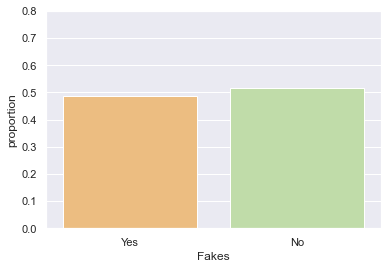

In [18]:
p1 = sns.barplot(x='fake', y='proportion_Fakes', data=Fake_News_Data, palette="Spectral") 
p1.set_yticks( np.arange(0, 0.85, 0.1)  )
p1.set_xticklabels(['Yes', 'No'])
p1.axes.set(xlabel='Fakes', ylabel='proportion')

In [68]:
[prop_Fake_yes , prop_Fake_no]

[0.48533488330501656, 0.5146651166949835]

In [69]:
[prop_Fake_yes*len(Fake_News_Data) , prop_Fake_no*len(Fake_News_Data)]

[32565.0, 34533.0]

In [20]:
Fake_News_Data['word_count'] = Fake_News_Data['text'].str.split().str.len()

In [21]:
Fake_News_Data.groupby('fake')['word_count'].mean()

fake
0    577.107969
1    506.322040
Name: word_count, dtype: float64

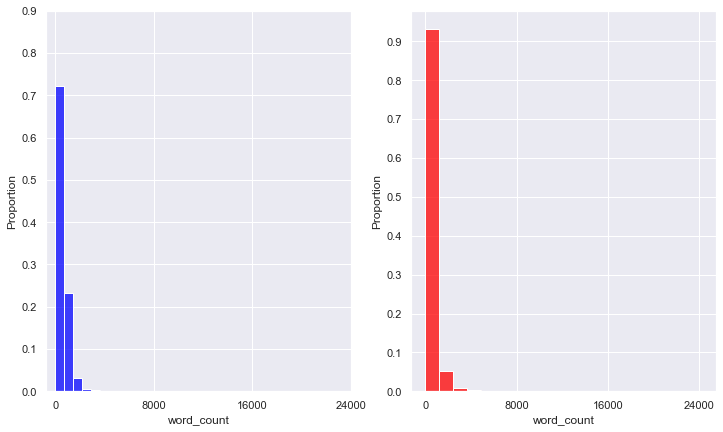

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))

p1 = sns.histplot(x=Fake_News_Data[Fake_News_Data['fake']==0]['word_count'], stat="proportion", bins=20, color="blue", ax=axs[0] )
p1.set_xticks( range(int(Fake_News_Data['word_count'].min()) , int(Fake_News_Data['word_count'].max() ) , 8000) )
p1.set_yticks( np.arange(0, 1, 0.1)  )

p2 = sns.histplot(x=Fake_News_Data[Fake_News_Data['fake']==1]['word_count'], stat="proportion", bins=20, color="red" , ax=axs[1])
p2.set_xticks( range(int(Fake_News_Data['word_count'].min()) , int(Fake_News_Data['word_count'].max() ) , 8000) )
p2.set_yticks( np.arange(0, 1, 0.1)  )

plt.show()

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
CountVect = CountVectorizer(stop_words='english')
X_train_counts = CountVect.fit_transform(Fake_News_Data['text'])

In [25]:
X_train_counts.shape

(67098, 234143)

In [26]:
CountVect.vocabulary_.get('comment')

44043

In [27]:
CountVect.stop_words_

set()

In [28]:
def limpiar_tokenizar(texto):

    import re
    
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''
    
    # Se convierte todo el texto a minúsculas

    nuevo_texto = texto.lower()
    
    # Eliminación de páginas web (palabras que empiezan por "http")
    
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    
    # Eliminación de signos de puntuación
    
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    
    # Eliminación de números
    
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    
    # Eliminación de espacios en blanco múltiples
    
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    
    # Tokenización por palabras individuales
    
    nuevo_texto = nuevo_texto.split(sep = ' ')
    
    # Eliminación de tokens con una longitud <= 1
    
    nuevo_texto = [token for token in nuevo_texto if len(token) >=  2]
    
    return(nuevo_texto)

In [29]:

test = "Esto es 1 ejemplo de l'limpieza de6 TEXTO  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining"

print(limpiar_tokenizar(texto=test))

['esto', 'es', 'ejemplo', 'de', 'limpieza', 'de', 'texto', 'cienciadedatos', 'textmining']


In [30]:
Fake_News_Data['text'][0]

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [31]:
print(limpiar_tokenizar(texto=Fake_News_Data['text'][0]))

['no', 'comment', 'is', 'expected', 'from', 'barack', 'obama', 'members', 'of', 'the', 'fyf', 'or', 'fukyoflag', 'and', 'blacklivesmatter', 'movements', 'called', 'for', 'the', 'lynching', 'and', 'hanging', 'of', 'white', 'people', 'and', 'cops', 'they', 'encouraged', 'others', 'on', 'radio', 'show', 'tuesday', 'night', 'to', 'turn', 'the', 'tide', 'and', 'kill', 'white', 'people', 'and', 'cops', 'to', 'send', 'message', 'about', 'the', 'killing', 'of', 'black', 'people', 'in', 'america', 'one', 'of', 'the', 'yoflag', 'organizers', 'is', 'called', 'sunshine', 'she', 'has', 'radio', 'blog', 'show', 'hosted', 'from', 'texas', 'called', 'sunshine', 'ing', 'opinion', 'radio', 'show', 'snapshot', 'of', 'her', 'fyf', 'lolatwhitefear', 'twitter', 'page', 'at', 'shows', 'that', 'she', 'was', 'urging', 'supporters', 'to', 'call', 'now', 'fyf', 'tonight', 'we', 'continue', 'to', 'dismantle', 'the', 'illusion', 'of', 'white', 'below', 'is', 'snapshot', 'twitter', 'radio', 'call', 'invite', 'fyf',

In [32]:
Fake_News_Data['text_tokenizado'] = Fake_News_Data['text'].apply(lambda x: limpiar_tokenizar(x))

In [33]:
Fake_News_Data = Fake_News_Data.drop('proportion_Fakes', axis=1)

Fake_News_Data['id_text'] = range(0, len(Fake_News_Data))

Fake_News_Data

,title,text,fake,word_count,text_tokenizado,id_text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,871,"[no, comment, is, expected, from, barack, obam...",0
1,NaN,Did they post their votes for Hillary already?,1,8,"[did, they, post, their, votes, for, hillary, ...",1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,34,"[now, most, of, the, demonstrators, gathered, ...",2
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,1321,"[dozen, politically, active, pastors, came, he...",3
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,329,"[the, rs, sarmat, missile, dubbed, satan, will...",4
...,...,...,...,...,...,...
67093,JUDGE JEANINE SOUNDS FREE SPEECH ALARM: “They ...,Judge Jeanine lets it rip! She s concerned wit...,1,796,"[judge, jeanine, lets, it, rip, she, concerned...",67093
67094,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,735,"[washington, reuters, hackers, believed, to, b...",67094
67095,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,604,"[you, know, because, in, fantasyland, republic...",67095
67096,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,477,"[migrants, refuse, to, leave, train, at, refug...",67096


In [34]:
Fake_News_Tokens = Fake_News_Data.loc[:, ['id_text', 'text_tokenizado', 'fake'] ].explode(column='text_tokenizado')

Fake_News_Tokens = Fake_News_Tokens.rename(columns={'text_tokenizado':'token'})

In [35]:
Fake_News_Tokens

,id_text,token,fake
0,0,no,1
0,0,comment,1
0,0,is,1
0,0,expected,1
0,0,from,1
...,...,...,...
67097,67097,hamburg,0
67097,67097,“we’re,0
67097,67097,right,0
67097,67097,behind,0


In [36]:
# nº de palabras (tokens) en el conjunto de textos clasificados como fake y en los no fake

Fake_News_Tokens.groupby(by='fake')['token'].count()

fake
0    17874714
1    16866338
Name: token, dtype: int64

In [37]:
# nº de palabras (tokens) unicas en el conjunto de textos clasificados como fake y en los no fake

Fake_News_Tokens.groupby(by='fake')['token'].nunique()

fake
0    157664
1    199554
Name: token, dtype: int64

In [38]:
# nº medio de palabras (tokens) de los textos clasificados como fake y en los no fake

df1 = pd.DataFrame( Fake_News_Tokens.groupby(by = ["fake", "id_text"] )["token"].count() )

In [39]:
df1

token
fake id_text       
0    0            0
     1            0
     2            0
     3         1273
     4            0
...             ...
1    67093      795
     67094        0
     67095      595
     67096        0
     67097        0

[134196 rows x 1 columns]

In [41]:
df2 = df1.loc[df1['token'] != 0, :]

In [42]:
df2

token
fake id_text       
0    3         1273
     11         364
     12         413
     14         465
     15         252
...             ...
1    67083      156
     67086      405
     67092      202
     67093      795
     67095      595

[66327 rows x 1 columns]

In [43]:
df2.groupby("fake")["token"].agg(['mean'])

,mean
fake,
0,548.910269
1,499.550929


Otra forma de hacer lo anterior (longitud media de las noticias fake y no fake)

In [44]:
m0 = ( Fake_News_Tokens.loc[Fake_News_Tokens['fake']==0].groupby('id_text')['token'].count() ).mean()

In [45]:
m1 = ( Fake_News_Tokens.loc[Fake_News_Tokens['fake']==1].groupby('id_text')['token'].count() ).mean()

In [46]:
pd.DataFrame({'fake_new': [0,1] , 'tokens_mean':[m0 , m1]})

,fake_new,tokens_mean
0,0,548.893413
1,1,488.412185


In [53]:
df = pd.DataFrame(  (Fake_News_Tokens.groupby(by = ["fake", "token"] )["token"].count().reset_index(name='count')))

In [54]:
df # Nos da el nº de veces que sale cada token en el conjunto de las noticas fake y por otro lado en el de las no fake

,fake,token,count
0,0,aa,31
1,0,aaa,22
2,0,aaaaaaaand,0
3,0,aaaaackkk,0
4,0,aaaaah,1
...,...,...,...
563611,1,🙃🙃🙃,0
563612,1,🙏🏻,0
563613,1,🚨alert🚨,0
563614,1,🚨bill,1


In [59]:
df.loc[df['token']=='yes' , ] # El token 'yes' aprece 1291 veces en el conjunto de las fake news y 2913 en el de las no fake news

,fake,token,count
224836,0,yes,1291
506644,1,yes,2913


In [75]:
df.loc[df['fake']==0 , ] # nº de tokens en el conjunto de las fake news

,fake,token,count,proportion
0,0,aa,31,0.000952
1,0,aaa,22,0.000676
2,0,aaaaaaaand,0,0.000000
3,0,aaaaackkk,0,0.000000
4,0,aaaaah,1,0.000031
...,...,...,...,...
281803,0,🙃🙃🙃,1,0.000031
281804,0,🙏🏻,1,0.000031
281805,0,🚨alert🚨,2,0.000061
281806,0,🚨bill,0,0.000000


In [76]:
df.loc[df['fake']==1 , ] # nº de tokens en el conjunto de las no fake news

,fake,token,count,proportion
281808,1,aa,98,0.002838
281809,1,aaa,10,0.000290
281810,1,aaaaaaaand,1,0.000029
281811,1,aaaaackkk,1,0.000029
281812,1,aaaaah,0,0.000000
...,...,...,...,...
563611,1,🙃🙃🙃,0,0.000000
563612,1,🙏🏻,0,0.000000
563613,1,🚨alert🚨,0,0.000000
563614,1,🚨bill,1,0.000029


In [82]:
df_fake_sort = df.loc[df['fake']==0 , ].sort_values(by=["count"], ascending=False).reset_index(drop=False)

In [83]:
df_no_fake_sort = df.loc[df['fake']==1 , ].sort_values(by=["count"], ascending=False).reset_index(drop=False)

In [84]:
df_fake_sort.head(15)

,index,fake,token,count,proportion
0,200185,0,the,1088823,33.435375
1,202850,0,to,531289,16.314724
2,142375,0,of,476977,14.646922
3,7649,0,and,430196,13.210379
4,95147,0,in,398744,12.244557
5,200083,0,that,233354,7.165791
6,143516,0,on,200646,6.161400
7,72386,0,for,178977,5.495993
8,175032,0,said,171608,5.269707
9,99398,0,is,146390,4.495317


In [85]:
df_no_fake_sort.head(15)

,index,fake,token,count,proportion
0,481993,1,the,980567,28.395071
1,484658,1,to,495038,14.335216
2,424183,1,of,445101,12.889150
3,289457,1,and,417868,12.100542
4,376955,1,in,310266,8.984623
5,481891,1,that,250563,7.255755
6,381206,1,is,205477,5.950164
7,354194,1,for,159591,4.621406
8,425324,1,on,137433,3.979758
9,381744,1,it,135412,3.921235


En la tabla anterior puede observarse que los términos más frecuentes en todos los usuarios se corresponden con artículos, preposiciones, pronombres…, en general, palabras que no aportan información relevante sobre el texto. Ha estas palabras se les conoce como stopwords. Para cada idioma existen distintos listados de stopwords, además, dependiendo del contexto, puede ser necesario adaptar el listado. Por ejemplo, en la tabla anterior aparece el término amp que procede de la etiqueta html &amp. Con frecuencia, a medida que se realiza un análisis se encuentran palabras que deben incluirse en el listado de stopwords.

In [88]:
# pip install nltk

     ---------------------------------------- 1.5/1.5 MB 15.8 MB/s eta 0:00:00
     ------------------------------------- 267.7/267.7 kB 17.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [90]:
# Obtención de listado de stopwords del inglés
# ==============================================================================
stop_words = list(stopwords.words('english'))

In [93]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [99]:
df_fake_sort_sin_StopWords = df_fake_sort[ ~ df_fake_sort['token'].isin(stop_words) ] # ranking de tokens para las fake news sin stop words

In [100]:
df_no_fake_sort_sin_StopWords = df_no_fake_sort[ ~ df_no_fake_sort['token'].isin(stop_words) ] # ranking de tokens para las no fake news sin stop words

In [101]:
df_fake_sort_sin_StopWords.head(15)

,index,fake,token,count,proportion
8,175032,0,said,171608,5.269707
23,206256,0,trump,78384,2.407001
29,132633,0,mr,61036,1.874282
31,222712,0,would,57826,1.775710
37,157601,0,president,45215,1.388454
44,137379,0,new,39282,1.206264
47,143582,0,one,38640,1.186550
49,150581,0,people,36985,1.135729
50,6207,0,also,34103,1.047229
51,190658,0,state,33994,1.043881


In [102]:
df_no_fake_sort_sin_StopWords.head(15)

,index,fake,token,count,proportion
15,488064,1,trump,96774,2.802363
36,456840,1,said,46307,1.340949
37,432389,1,people,44510,1.288912
39,425390,1,one,42279,1.224307
42,504520,1,would,40049,1.159731
45,318536,1,clinton,38723,1.121333
50,439409,1,president,36011,1.042800
60,493795,1,us,32020,0.927229
61,397519,1,like,29467,0.853300
62,370814,1,hillary,27959,0.809631


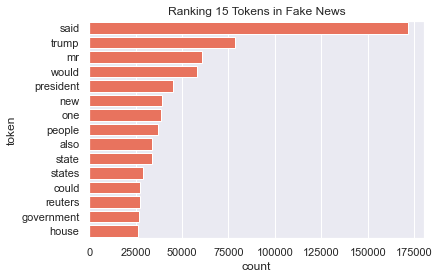

In [128]:
p1 = sns.barplot(data=df_fake_sort_sin_StopWords.head(15), x='count', y='token', color='tomato').set(title='Ranking 15 Tokens in Fake News') 

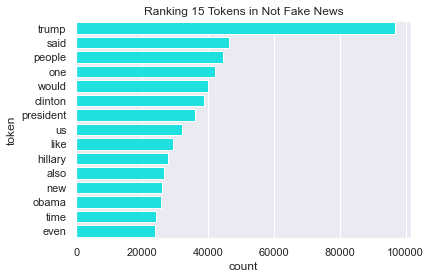

In [129]:
p2 = sns.barplot(data=df_no_fake_sort_sin_StopWords.head(15), x='count', y='token', color='cyan').set(title='Ranking 15 Tokens in Not Fake News') 

A continuación, se estudia qué palabras se utilizan de forma más diferenciada en cada tipo de noticia (fake / no fake), es decir, palabras que utiliza mucho en fake newa y que no se utilizan en las no fakes, y viceversa. 

Una forma de hacer este análisis es mediante el odds ratio de las frecuencias.

$$\dfrac{ \frac{n_{k0} + 1}{N_0 + 1} }{  \frac{n_{k1} + 1}{N_1 +1}  }$$
 
Donde:

$n_{k0}$  el número de veces que aparece el término (token) k en las fake news  

$n_{k1}$ el numero de veces  que aparece el termino (token) k en las no fake news.

$N_0$ es el número de terminos (tokens, contando repeticiones) que aparecen en las fake news 

$N_1$ es el número de terminos (tokens, contando repeticiones) que aparecen en las no fake news 

In [149]:
def n_k0(token) : 

    n_k0 = df_fake_sort_sin_StopWords.loc[ df_fake_sort_sin_StopWords['token']==token , 'count']

    return(n_k0)

In [150]:
def n_k1(token) : 

    n_k1 = df_no_fake_sort_sin_StopWords.loc[ df_no_fake_sort_sin_StopWords['token']==token , 'count']

    return(n_k1)

In [184]:
n_k0('said') 

8    171608
Name: count, dtype: int64

In [152]:
n_k1('said') 

36    46307
Name: count, dtype: int64

N_0 y N_1 coinciden con el nº de tokens (contando repeticiones , y sin stops words) que aparecen el las fake  y no fake news, respectivamente:

In [162]:
N0 = Fake_News_Tokens[ ~ Fake_News_Tokens['token'].isin(stop_words) ].groupby(by='fake')['token'].count()[0]

N1 = Fake_News_Tokens[ ~ Fake_News_Tokens['token'].isin(stop_words) ].groupby(by='fake')['token'].count()[1]

In [163]:
N0

10781332

In [164]:
N1

9839242

In [180]:
n_k0('said') / N0 

8    0.015917
Name: count, dtype: float64

In [181]:
n_k1('said') / N1

36    0.004706
Name: count, dtype: float64

In [179]:
float( n_k0('said') / N0 ) / float( n_k1('said') / N1 )

3.382050640907871

In [182]:
df_fake_sort_sin_StopWords

,index,fake,token,count,proportion
8,175032,0,said,171608,5.269707
23,206256,0,trump,78384,2.407001
29,132633,0,mr,61036,1.874282
31,222712,0,would,57826,1.775710
37,157601,0,president,45215,1.388454
...,...,...,...,...,...
281803,93056,0,iamtanianow,0,0.000000
281804,187915,0,soris,0,0.000000
281805,93057,0,iamtat,0,0.000000
281806,93058,0,iamthebassman,0,0.000000


In [188]:
for i, j in zip(range(0,5), range(5,10)) :

    print(i,j)

0 5
1 6
2 7
3 8
4 9


In [189]:
df_fake_sort_sin_StopWords['Odds_ratio']=

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\2061116673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_sort_sin_StopWords['Odds_ratio']=range(0, len(df_fake_sort_sin_StopWords))


In [193]:
df_fake_sort_sin_StopWords.index=range(0, len(df_fake_sort_sin_StopWords))

In [195]:
df_fake_sort_sin_StopWords['Odds_ratio'] = 0

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\3625015781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_sort_sin_StopWords['Odds_ratio'] = 0


In [212]:
df0 = df_fake_sort_sin_StopWords.sort_values(by=["token"]).reset_index(drop=True)
df0

,index,fake,token,count,proportion,Odds_ratio
0,0,0,aa,31,0.000952,0.0
1,1,0,aaa,22,0.000676,0.0
2,2,0,aaaaaaaand,0,0.000000,0.0
3,3,0,aaaaackkk,0,0.000000,0.0
4,4,0,aaaaah,1,0.000031,0.0
...,...,...,...,...,...,...
281659,281803,0,🙃🙃🙃,1,0.000031,0.0
281660,281804,0,🙏🏻,1,0.000031,0.0
281661,281805,0,🚨alert🚨,2,0.000061,0.0
281662,281806,0,🚨bill,0,0.000000,0.0


In [214]:
df1 = df_no_fake_sort_sin_StopWords.sort_values(by=["token"]).reset_index(drop=True)
df1

,index,fake,token,count,proportion
0,281808,1,aa,98,0.002838
1,281809,1,aaa,10,0.000290
2,281810,1,aaaaaaaand,1,0.000029
3,281811,1,aaaaackkk,1,0.000029
4,281812,1,aaaaah,0,0.000000
...,...,...,...,...,...
281659,563611,1,🙃🙃🙃,0,0.000000
281660,563612,1,🙏🏻,0,0.000000
281661,563613,1,🚨alert🚨,0,0.000000
281662,563614,1,🚨bill,1,0.000029


In [215]:
n_k0_vector = df0['count']

In [216]:
( n_k0_vector + 1 ) / ( N0 + 1)

0         2.968093e-06
1         2.133317e-06
2         9.275291e-08
3         9.275291e-08
4         1.855058e-07
              ...     
281659    1.855058e-07
281660    1.855058e-07
281661    2.782587e-07
281662    9.275291e-08
281663    1.855058e-07
Name: count, Length: 281664, dtype: float64

In [217]:
n_k1_vector = df1['count']

In [218]:
( n_k1_vector + 1 ) / ( N1 + 1)

0         1.006175e-05
1         1.117972e-06
2         2.032677e-07
3         2.032677e-07
4         1.016338e-07
              ...     
281659    1.016338e-07
281660    1.016338e-07
281661    1.016338e-07
281662    2.032677e-07
281663    1.016338e-07
Name: count, Length: 281664, dtype: float64

In [223]:
Odds_ratio = ( ( n_k0_vector + 1 ) / ( N0 + 1) ) / ( ( n_k1_vector + 1 ) / ( N1 + 1) )

In [224]:
Odds_ratio

0         0.294988
1         1.908202
2         0.456309
3         0.456309
4         1.825237
            ...   
281659    1.825237
281660    1.825237
281661    2.737855
281662    0.456309
281663    1.825237
Name: count, Length: 281664, dtype: float64

In [240]:
df0['Odds_ratio_Fake_notFake'] = Odds_ratio  
df1['Odds_ratio_Fake_notFake'] = Odds_ratio  

In [241]:
df0

,index,fake,token,count,proportion,Odds_ratio,Odds_ratio_Fake_notFake
0,0,0,aa,31,0.000952,0.294988,0.294988
1,1,0,aaa,22,0.000676,1.908202,1.908202
2,2,0,aaaaaaaand,0,0.000000,0.456309,0.456309
3,3,0,aaaaackkk,0,0.000000,0.456309,0.456309
4,4,0,aaaaah,1,0.000031,1.825237,1.825237
...,...,...,...,...,...,...,...
281659,281803,0,🙃🙃🙃,1,0.000031,1.825237,1.825237
281660,281804,0,🙏🏻,1,0.000031,1.825237,1.825237
281661,281805,0,🚨alert🚨,2,0.000061,2.737855,2.737855
281662,281806,0,🚨bill,0,0.000000,0.456309,0.456309


In [231]:
df0.sort_values(by=["Odds_ratio"], ascending=False).reset_index(drop=True).head(15)

,index,fake,token,count,proportion,Odds_ratio
0,163559,0,rakhine,831,0.025518,759.298519
1,172046,0,rohingya,1954,0.060003,594.722998
2,129975,0,mnangagwa,389,0.011945,355.921181
3,202806,0,tmsnrt,316,0.009704,289.300037
4,160566,0,puigdemont,600,0.018425,274.241833
5,122068,0,marawi,270,0.008291,247.319590
6,16671,0,barnier,268,0.008230,245.494353
7,14786,0,babis,252,0.007738,230.892458
8,202084,0,tillerson’s,231,0.007094,211.727472
9,147604,0,pamkeynen,227,0.006971,208.076998


In [252]:
df1.sort_values(by=["Odds_ratio"], ascending=True).reset_index(drop=True)['token'].head(300)

0                       что
1                        не
2                      quot
3                       это
4                        по
5                       как
6              filessupport
7               somodevilla
8                       для
9                        мы
10                       то
11                       но
12               henningsen
13                       из
14                       js
15                       zu
16                  trunews
17                       за
18                   pilger
19                     its
20                  sheeple
21                      сша
22                       на
23                  mcnamee
24                  angerer
25                      так
26                       от
27                      fjs
28                     dapl
29                      auf
30                wikimedia
31                       бы
32                      wmw
33                      все
34                   hesher
35                  

In [199]:
### Alternativa computacionalmente mas costosa:

# for token , i in zip( df_fake_sort_sin_StopWords['token'] , range(0, len(df_fake_sort_sin_StopWords)) ):

   # df_fake_sort_sin_StopWords['Odds_ratio_Fake_NotFake'][i] = float( (n_k0(token) + 1) / (N0 + 1) ) / float( (n_k1(token) + 1) / (N1 + 1) )

# for token , i in zip( df_no_fake_sort_sin_StopWords['token'] , range(0, len(df_no_fake_sort_sin_StopWords)) ):

   # df_no_fake_sort_sin_StopWords['Odds_ratio_Fake_NotFake'][i] = float( (n_k0(token) + 1) / (N0 + 1) ) / float( (n_k1(token) + 1) / (N1 + 1) )

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\2005476987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_sort_sin_StopWords['Odds_ratio'][i] = float( (n_k0(token) + 1) / (N0 + 1) ) / float( (n_k1(token) + 1) / (N1 + 1) )


KeyboardInterrupt: 